<a href="https://colab.research.google.com/github/guruboy001/machine_learning_codes/blob/master/Regularisation_of_linear_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook I will be going through the various means of constraining the weights of linear models. 
Please note regularisation is used when our model have a high variance, i.e it has overfitted the training data. It simplifies the model and flattens the it, Thereby increasing it's bias. Regularisation is good as it makes a model with high variance perform better on the training set.




**credit**- Aurelien Geron (Hands on machine learning with scikit-learn, keras and tensorflow)

#Ridge Regression

In ridge regression the hyperparameter alhpa controls how the model is regularised. A high value of alpha gives a model with weights very close to zero. This result in flat line going through the data's mean. Ridge regression adds the regularisation term to the cost function.

It can be implemented in sklearn by simply  importing the Ridge class from sklearn.linear_model.
The formular of ridge regression in a close form loop is 
*

```
# np.pinv(X.T.dot(X) + alpha*A).dot(X.T.dot(y))*.
```
where A is the (n+1) x (n+1) identity matrix, except with a 0 at the top-left cell corresponding to the bias term.



```
# This is formatted as code
```



 

In [0]:
from sklearn.linear_model import Ridge 

Lets generate some random inputs with numpy

In [0]:
import numpy as np
import pandas as pd

x = 2 * np.random.rand(100,1)
y = 4 + 3 *x + np.random.rand(100,1)

Lets add bias to the x values

In [0]:
X = np.c_[np.ones((100,1)),x]

In [4]:
X[1:5]

array([[1.        , 1.12420849],
       [1.        , 0.52587783],
       [1.        , 1.65967328],
       [1.        , 1.72801047]])

Now lets fit our regularisation model

In [5]:
linear_ridge_regression = Ridge(alpha=1.0,solver='cholesky')
linear_ridge_regression.fit(X,y)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='cholesky', tol=0.001)

now lets plot and see what the line looks like. Please note we need to create a new variable to plot our model over a uniform space

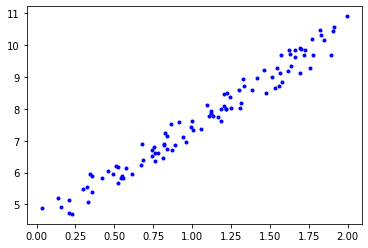

In [6]:
import matplotlib.pyplot as plt
plt.plot(x,y,"b.")

In [0]:
X_new = np.linspace(0,2,100,).reshape(100,1)
X_ = np.c_[np.ones((100,1)),X_new]

In [0]:
y_new = linear_ridge_regression.predict(X_)

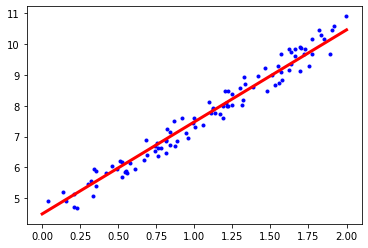

In [9]:
plt.plot(x,y,"b.")
plt.plot(X_new,y_new,"r-",linewidth=3)

Lets try this with various values of alpha

In [0]:
def plot_alpha(alpha,x,y):
    X=np.linspace(0,2,100)
    X_data = np.c_[np.ones((100,1)),x]
    X_ = np.c_[np.ones((100,1)),X]
    color = ["k-","r-","y-","b-"]
    for i in alpha:
        lin_reg = Ridge(alpha=i,solver="cholesky")
        lin_reg.fit(X_data,y)
        y_new = lin_reg.predict(X_)
        plt.plot(x,y,"b.",)
        plt.plot(X,y_new,color[alpha.index(i)],label=i,linewidth=5)
        plt.legend()
        

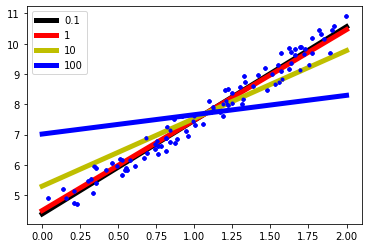

In [11]:
alpha = [0.1,1,10,100]
plot_alpha(alpha,x,y)

As we can see from the plot as the value of alpha gets higher the slope gets flatter. 

Ridge regressor can also be realised by setting the penalty of SGDRegrssor to "l2".
as shown below 

In [0]:
from sklearn.linear_model import SGDRegressor
def plot_sgd_alpha(alpha,x,y):
    X=np.linspace(0,2,100)
    X_data = np.c_[np.ones((100,1)),x]
    X_ = np.c_[np.ones((100,1)),X]
    color = ["k-","r-","y-","x-"]
    for i in alpha:
        sgd_reg = SGDRegressor(penalty="l2")
        sgd_reg.fit(X_data,y.ravel())
        y_new = sgd_reg.predict(X_)
        plt.plot(x,y,"b.",)
        plt.plot(X,y_new,color[alpha.index(i)],label=i,linewidth=5)
        plt.legend()
        

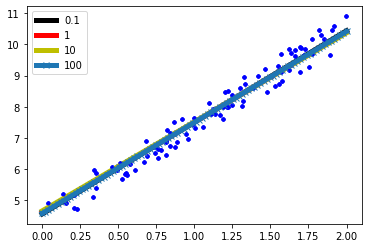

In [13]:
plot_sgd_alpha(alpha,x,y)

#Lasso Regression
(Least Absolute Shrinkage and Selection Operator Regression)
J(theta) = MSE(theta) + alpha*sum(from i to n of absolute(theta[i])).

The important feature of Lasso regression is that it eliminates the weigth of the least important features. It performs feature selection and outputs a sparse model with the weights of the least important features equal or almost equal to zero


In [0]:
from sklearn.linear_model import Lasso


In [0]:
def plot_alpha_lasso(alpha,x,y):
    X=np.linspace(0,2,100)
    X_data = np.c_[np.ones((100,1)),x]
    X_ = np.c_[np.ones((100,1)),X]
    color = ["k-","r-","y-","b-"]
    for i in alpha:
        lasso_reg = Lasso(alpha=i,random_state=42)
        lasso_reg.fit(X_data,y)
        y_new = lasso_reg.predict(X_)
        plt.plot(x,y,"b.",)
        plt.plot(X,y_new,color[alpha.index(i)],label=i,linewidth=5)
        plt.legend()
        

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.000478005282545, tolerance: 0.025752459109052155
  positive)


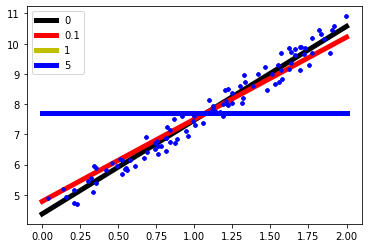

In [26]:
alpha = [0,0.1,1,5]
plot_alpha_lasso(alpha,x,y)


It's calculated using the l1 norm. Let's try it with SGDRegressor using penalty of l1

In [0]:
def plot_sgd_lasso_alpha(alpha,x,y):
    X=np.linspace(0,2,100)
    X_data = np.c_[np.ones((100,1)),x]
    X_ = np.c_[np.ones((100,1)),X]
    color = ["k-","r-","y-","x-"]
    for i in alpha:
        sgd_reg = SGDRegressor(penalty="l1")
        sgd_reg.fit(X_data,y.ravel())
        y_new = sgd_reg.predict(X_)
        plt.plot(x,y,"b.",)
        plt.plot(X,y_new,color[alpha.index(i)],label=i,linewidth=5)
        plt.legend()

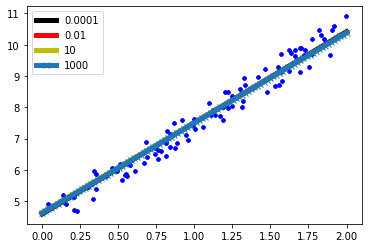

In [31]:
alpha = [0.0001,0.01,10,1000]
plot_sgd_lasso_alpha(alpha,x,y)

#Elastic Net

This is a mixture between the ridge regression and the lasso regression with their mix ratio of r, if r = 0, we have a purely Ridge regression and if r=1, we get a purely lasso regression.

It's cost function can be written as follows:

J(theta) = MSE(theta) + r*alpha*sum(from i to n of theta[i] + (1-r)/2 * alpha * sum(from i to n of theta[i]**2 

Here is simple implementation on sklearn

In [0]:
from sklearn.linear_model import ElasticNet
def plot_alpha_elastic(alpha,x,y):
    X=np.linspace(0,2,100)
    X_data = np.c_[np.ones((100,1)),x]
    X_ = np.c_[np.ones((100,1)),X]
    color = ["k-","r-","y-","b-"]
    for i in alpha:
        elastic_reg = ElasticNet(alpha=i,l1_ratio=0.5,random_state=42) # l1_ration refers to the ratio of the ridge to the lasso mix(mix ratio)
        elastic_reg.fit(X_data,y)
        y_new = elastic_reg.predict(X_)
        plt.plot(x,y,"b.",)
        plt.plot(X,y_new,color[alpha.index(i)],label=i,linewidth=5)
        plt.legend()
        

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.000478005282545, tolerance: 0.025752459109052155
  positive)


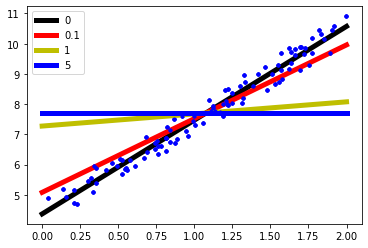

In [34]:
alpha = [0,0.1,1,5]
plot_alpha_elastic(alpha,x,y)


As we come to conclusion, While deciding which of the regularisation model to use. The default is the Ridge regularisation but if too many uneccessary features, then lasso regularisation will be an option.
However Lasso regularisation maybe too erratic in elimination of features especially in situation when there are more features than the training instances, or a situation of strongly correlated features. In such case the Elastic Net is prefered